In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [7]:
train = pd.read_csv('C:/Users/nicolas.conceicao/Desktop/Big Data e Data Science/BootCamp DataScience/Titanic/train.csv')
test = pd.read_csv('C:/Users/nicolas.conceicao/Desktop/Big Data e Data Science/BootCamp DataScience/Titanic/test.csv')

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

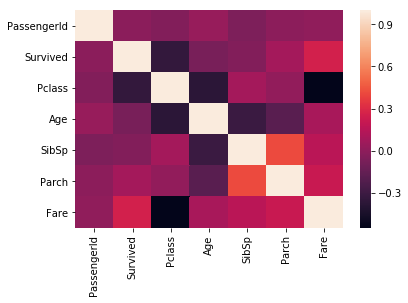

In [14]:
sns.heatmap(train.corr())
plt.show()

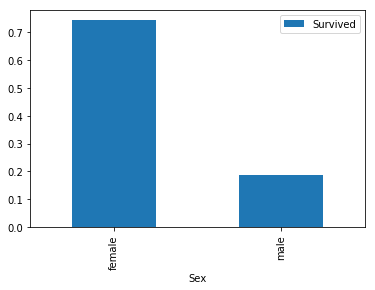

In [15]:
sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

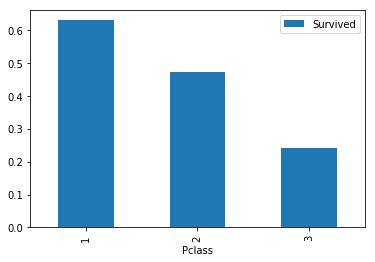

In [16]:
class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()
plt.show()

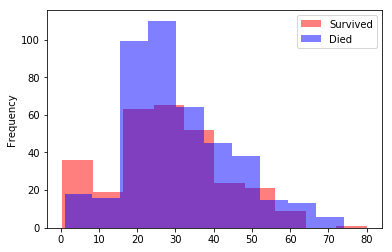

In [17]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]
survived['Age'].plot.hist(alpha=0.5, color='red', bins=10)
died['Age'].plot.hist(alpha=0.5, color='blue', bins=10)
plt.legend(['Survived', 'Died'])
plt.show()


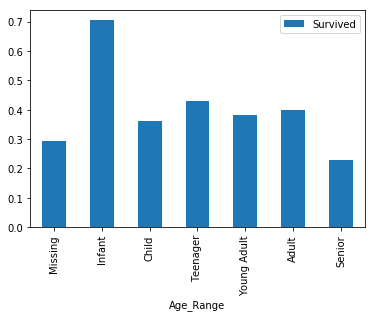

In [18]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_Range'] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

age_pivot = train.pivot_table(index='Age_Range', values='Survived')
age_pivot.plot.bar()

In [19]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

train = create_dummies(train, 'Pclass')
test = create_dummies(test, 'Pclass')

train = create_dummies(train, 'Sex')
test = create_dummies(test, 'Sex')

train = create_dummies(train, 'Age_Range')
test = create_dummies(test, 'Age_Range')

In [20]:
train[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Pclass_1                 891 non-null uint8
Pclass_2                 891 non-null uint8
Pclass_3                 891 non-null uint8
Sex_female               891 non-null uint8
Sex_male                 891 non-null uint8
Age_Range_Missing        891 non-null uint8
Age_Range_Infant         891 non-null uint8
Age_Range_Child          891 non-null uint8
Age_Range_Teenager       891 non-null uint8
Age_Range_Young Adult    891 non-null uint8
Age_Range_Adult          891 non-null uint8
Age_Range_Senior         891 non-null uint8
dtypes: uint8(12)
memory usage: 10.5 KB


In [5]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
           'Age_Range_Missing','Age_Range_Infant', 'Age_Range_Child',
           'Age_Range_Teenager', 'Age_Range_Young Adult', 'Age_Range_Adult',
           'Age_Range_Senior']

In [55]:
lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
holdout = test # from now on we will refer to this dataframe as the holdout data

In [73]:
X = train[columns]
y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
lr = LogisticRegression()
lr.fit(train_X[columns], train_y)

predictions = lr.predict(test_X)

In [75]:
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.805970149254


In [76]:
lr = LogisticRegression()

scores = cross_val_score(lr, train_X, train_y, cv=10)
print(scores)

accuracy = np.mean(scores)
print(accuracy)

[ 0.75        0.77777778  0.90322581  0.87096774  0.75806452  0.69354839
  0.77419355  0.79032258  0.77419355  0.90322581]
0.799551971326


In [77]:
lr = LogisticRegression()
lr.fit(X, y)
holdout_predictions = lr.predict(holdout[columns])

In [78]:
submission_df = {'PassengerId': holdout['PassengerId'], 'Survived': holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [79]:
submission.to_csv('submission.csv', index=False)